# Pymaceuticals Inc.
---

### Analysis

This analysis merged two data table to perform analysis. One dataset contained mouse metadata, and one contained results of various treatments for tumors administered to these mice. Duplicate mouse IDs were complete removed as it was impossible to identify which mouse belonged to which measurements.

The data was then grouped by drug regimen and summary statistics were calculated for tumor volume and displayed in a data frame. The mean and median tumor volumes for mice treated with Capomulin and Ramicane appear to be smaller than for the other treatments, potentially indicating that they are more successful treatments. Furthermore the standard deviation and standard error are smaller, potentially indicating that the results are more reliable for these two treatments. 

A bar chart was then created to indicate the total number of observations for each drug regimen. Each mouse has multiple time points recorded, so this indicates total number of measurements recorded. 

A pie chart was generated to compare the number of male versus female mice across all treatment studies. It showed that the distribution between sex of mice was relatively equal. 

The quartiles and outliers were calculated for each of four treatments: Capomulin, Ramicane, Infubinol, and Ceftamin and were then displayed in a box and whisker plot. The plots indicated that of the four treatments, Capomulin and Ramicane had the lowest recorded tumor volumes. Only one outlier, for the Infubinol group was recorded.

A line plot was generated for a single mouse in the Capomulin treatment group that indicated decreasing tumor size over each recorded time point.

A scatter plot was generated to compare the weight of each mouse in the Capomulin treatment group to their average tumor volume. A linear regression was performed and a correlation coefficient was calculated. The correlation coefficient was calculated to be 0.84 indicating a strong positive relationship between mouse weight and average observed tumor volume. The results of the linear regression resulted in an r squared value of 0.709, indicating that the resulting line was highly predictive of tumor volume for a given mouse weight. Overall, these measures show that mouse weight is strongly related to average tumor volume. 

 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

study_merged = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
display(study_merged.info())
display(study_merged.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


None

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
study_merged["Mouse ID"].nunique()

249

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_values = study_merged[study_merged.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Set up a new data frame including only the rows where Mouse ID is not equal to g989
study_clean = study_merged[study_merged['Mouse ID'] != 'g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
study_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Groups rows by 'Drug Regimen'
drug_group = study_clean.groupby('Drug Regimen')

# Returns statistical analysis on Tumor Volume by drug group
mean_tumor = drug_group['Tumor Volume (mm3)'].mean()
median_tumor = drug_group['Tumor Volume (mm3)'].median()
variance_tumor = drug_group['Tumor Volume (mm3)'].var()
std_tumor = drug_group['Tumor Volume (mm3)'].std()
sem_tumor = drug_group['Tumor Volume (mm3)'].sem()

tumor_vol_by_drug = pd.DataFrame ({"Mean Tumor Volume": mean_tumor,
                                   "Median Tumor Volume": median_tumor,
                                   "Tumor Volume Variance": variance_tumor,
                                   "Tumor Volume Std. Dev.": std_tumor,
                                   "Tumor Volume Std. Err.": sem_tumor})
tumor_vol_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_summary = drug_group['Tumor Volume (mm3)'].agg(
    Mean = 'mean',
    Median = 'median',
    Variance = 'var',
    STD='std',
    SEM = 'sem'
    )
drug_tumor_summary

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

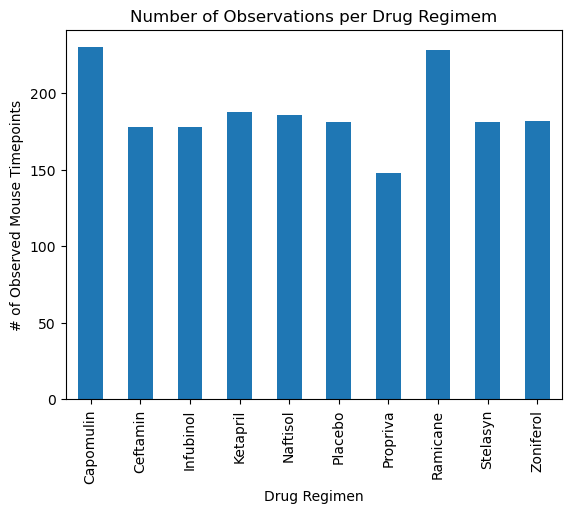

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_by_timepoint = drug_group['Timepoint'].count()
drug_by_timepoint.plot(kind="bar")
plt.title('Number of Observations per Drug Regimem')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

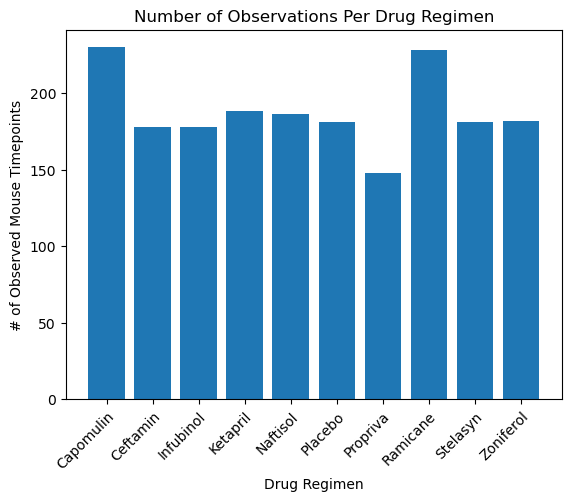

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Define the y axis as Mouse Timepoints
obs_count=drug_group['Timepoint'].count()

#Define the x axis as Drug Regimen
drug_list = obs_count.index
x_axis = np.arange(len(drug_list))

#Name each bar by Drug Regimen
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation=45, rotation_mode="anchor", ha="right")

#Create titles and axis labels
plt.title("Number of Observations Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, obs_count)
plt.show()

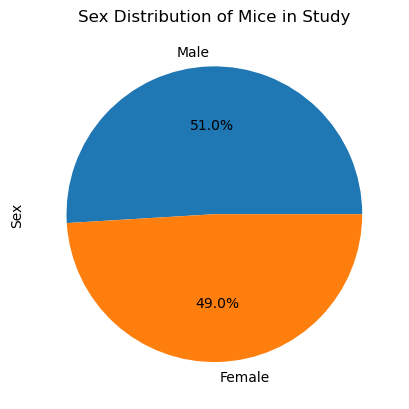

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = study_clean['Sex']

#Count the number of times male or female appears in the data
sex_counts = male_female.value_counts()

#Plot the data in the above count by sex
sex_counts.plot(kind="pie", y="Sex", autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Sex Distribution of Mice in Study")
plt.show()

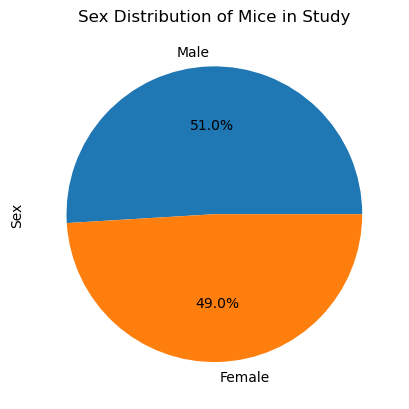

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Define index values to be the index of the count defined above (sex_counts = male_female.value_counts
index_values=sex_counts.index

plt.pie(sex_counts, labels = index_values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Sex Distribution of Mice in Study")

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
by_mouse = study_clean.groupby(["Mouse ID"])['Timepoint'].max()
by_mouse = by_mouse.reset_index()
tumor_merge = by_mouse.merge(study_clean, on=['Mouse ID', 'Timepoint'], how='left')
tumor_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

#Cycle though
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = tumor_merge.loc[tumor_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_volume.append(final_volume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds

    outliers = final_volume.loc[(final_volume > upper_bound) | (final_volume < lower_bound)]

    if len(outliers) > 0:
        print(f"{drug}'s potential outliers: {outliers}")
    else: 
        print(f"{drug} may not have any outliers")
    
    


    
    

    
    


Capomulin may not have any outliers
Ramicane may not have any outliers
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin may not have any outliers


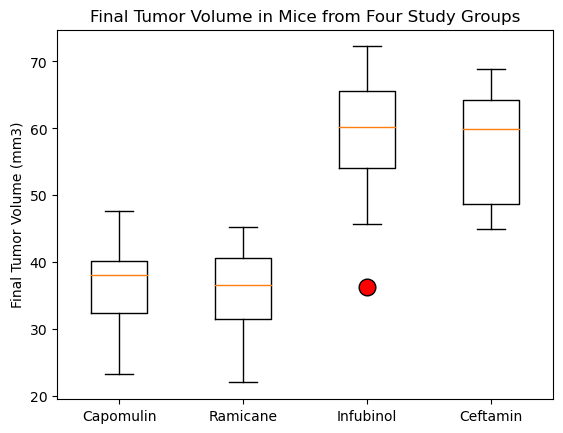

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels = drug_list, flierprops={'marker': 'o', 'markersize': '12', 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume in Mice from Four Study Groups")
plt.show()

## Line and Scatter Plots

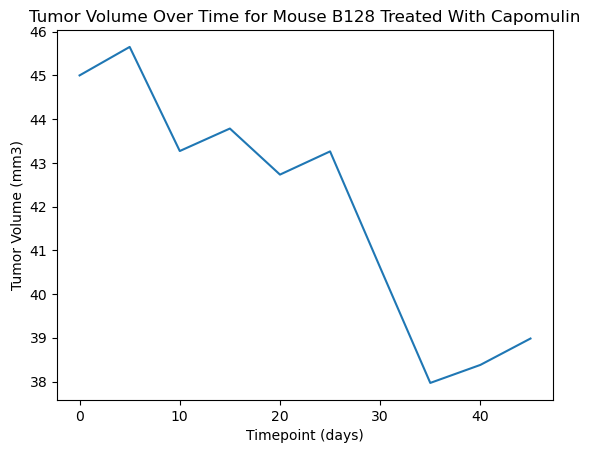

In [70]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Identify a mouse treated with Capomulin
capomulin_mouse = study_clean.loc[study_clean["Drug Regimen"] == "Capomulin"]
capomulin_mouse.head(5)

#Identify time stamp and tumor volume for selected mouse
single_mouse = study_clean.loc[study_clean["Mouse ID"] == "b128", ["Timepoint", "Tumor Volume (mm3)"]]
single_mouse.head(5)

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse B128 Treated With Capomulin")
plt.show()

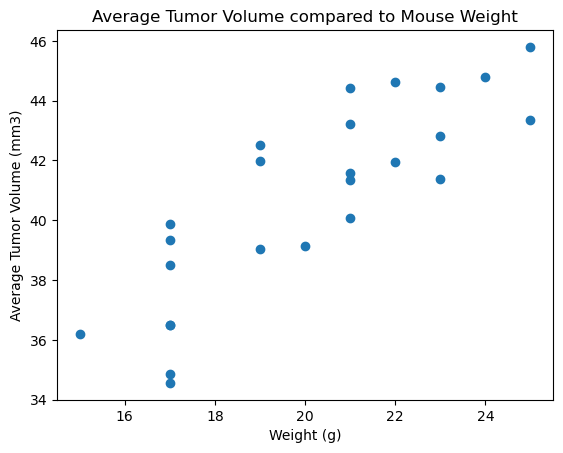

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create a dataframe with only mice treated with Capomulin
capomulin_only = study_clean.loc[study_clean["Drug Regimen"] == "Capomulin"]

# Group by mouse ID and calculate the average weight to produce one single weight per mouse (the weight repeats in the original data frame at every timepoint)
mouse_weight = capomulin_only.groupby(["Mouse ID"])['Weight (g)'].mean()

# Group by mouse ID and calculate the average Tumor Volume for each mouse
mouse_avg_tumor = capomulin_only.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()

# Make a scatter plot that compares the weight of mice on Capomulin with their average tumor volume
plt.scatter(mouse_weight, mouse_avg_tumor)
plt.title("Average Tumor Volume compared to Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


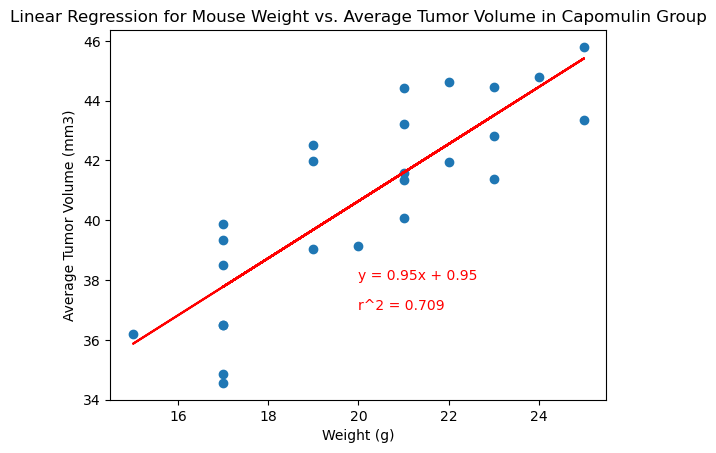

In [97]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = mouse_weight
y_values = mouse_avg_tumor

# Calculate correlation coefficient for mouse weight and average tumor volume
correlation = st.pearsonr(x_values,y_values)

# Perform linear regression and calculate regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Write regression line equation to be printed on the scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(slope,2))

# Calculate r squared
r_squared = f"r^2 = {round(rvalue**2, 3)}"

# Display the data above on a scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 38), fontsize = 10, color = "red")
plt.annotate(r_squared, (20, 37), fontsize = 10, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression for Mouse Weight vs. Average Tumor Volume in Capomulin Group")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")